In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体，替换为你系统支持的字体


# 读取数据
Midge = pd.read_csv('Midge.txt', delimiter=',', header=0)

# 将类别 "Apf" 标记为 1，类别 "Af" 标记为 -1
Midge['类别'] = np.where(Midge['物种'] == 'Apf', 1, -1)

# 提取特征和类别
X = Midge[['触角长度', '翅膀长度']].values
y = Midge['类别'].values
Midge

,物种,触角长度,翅膀长度,类别
0,Af,1.24,1.27,-1
1,Af,1.36,1.74,-1
2,Af,1.38,1.64,-1
3,Af,1.38,1.82,-1
4,Af,1.38,1.90,-1
5,Af,1.40,1.70,-1
6,Af,1.48,1.82,-1
7,Af,1.54,1.82,-1
8,Apf,1.56,2.08,1
9,Apf,1.14,1.82,1


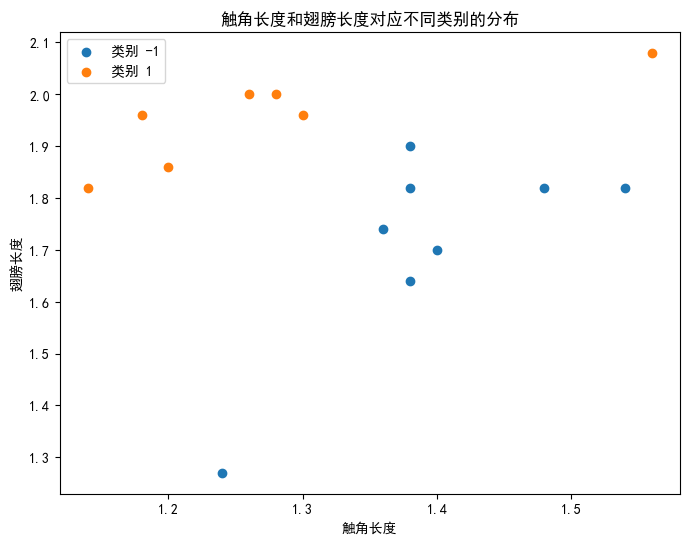

In [3]:
# 画出二维图
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'类别 {label}')
plt.xlabel('触角长度')
plt.ylabel('翅膀长度')
plt.title('触角长度和翅膀长度对应不同类别的分布')
plt.legend()
plt.show()

In [4]:
# 初始化感知器参数
w = np.zeros(X.shape[1])
b = 0
learning_rate = 0.1

# 训练感知器
converged = False
while not converged:
    misclassified = False
    for xi, target in zip(X, y):
        if target * (np.dot(xi, w) + b) <= 0:
            w += learning_rate * target * xi
            b += learning_rate * target
            misclassified = True
    if not misclassified:
        converged = True

# 打印感知器参数
print("感知器权重:", w)
print("感知器阈值:", b)

感知器权重: [-0.366  0.946]
感知器阈值: -1.3


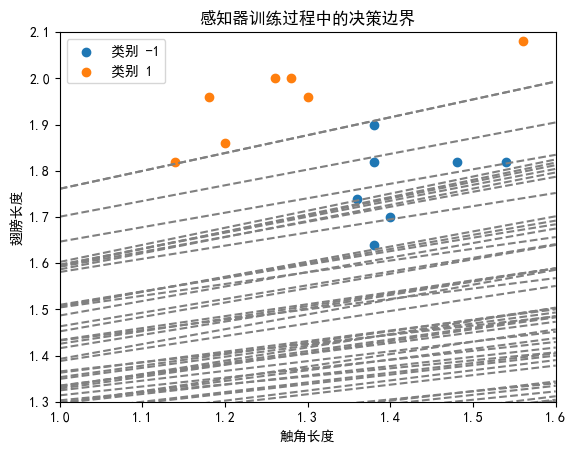

In [9]:
import matplotlib.pyplot as plt

# 初始化感知器参数
w = np.zeros(X.shape[1])
b = 0
learning_rate = 0.1

# 训练感知器
converged = False
fig, ax = plt.subplots()
plt.xlim(1, 1.6)  # 设置 x 轴范围
plt.ylim(1.3, 2.1)  # 设置 y 轴范围
while not converged:
    misclassified = False
    for xi, target in zip(X, y):
        if target * (np.dot(xi, w) + b) <= 0:
            w += learning_rate * target * xi
            b += learning_rate * target
            misclassified = True

    # 绘制分界线（决策边界）
    if w[1] != 0:
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        x_vals = np.array(ax.get_xlim())
        y_vals = intercept + slope * x_vals
        ax.plot(x_vals, y_vals, '--', color='gray')

    if not misclassified:
        converged = True

# 绘制样本点
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'类别 {label}')

plt.xlabel('触角长度')
plt.ylabel('翅膀长度')
plt.title('感知器训练过程中的决策边界')
plt.legend()
plt.show()


In [5]:
# 对测试数据进行分类和验证
test_data = np.array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]])
predicted = np.sign(np.dot(test_data, w) + b)

# 打印测试结果
print("测试数据分类结果:", predicted)

测试数据分类结果: [-1. -1.  1.]


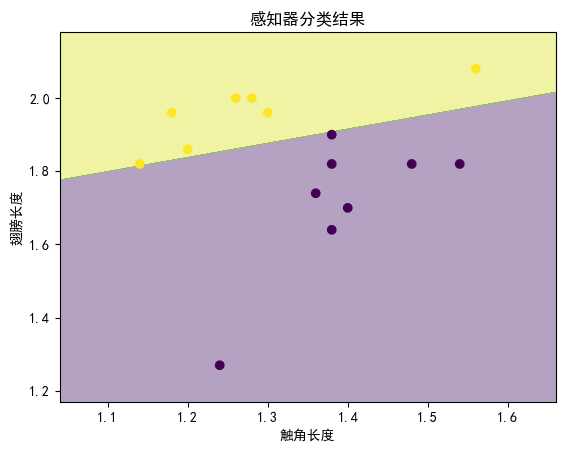

In [11]:
# 画图展示分类面和分类结果
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.0001), np.arange(y_min, y_max, 0.0001))
Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
plt.xlabel('触角长度')
plt.ylabel('翅膀长度')
plt.title('感知器分类结果')
plt.show()
